##Importing the libraries and the data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Principles/Final_assigment/weatherHistory.csv")
df.head()

,Formatted Date,Summary (target),Precip Type,Temperature (target),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary (target)          96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (target)      96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


##Visualizations

<ipython-input-6-c06d3e231b82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


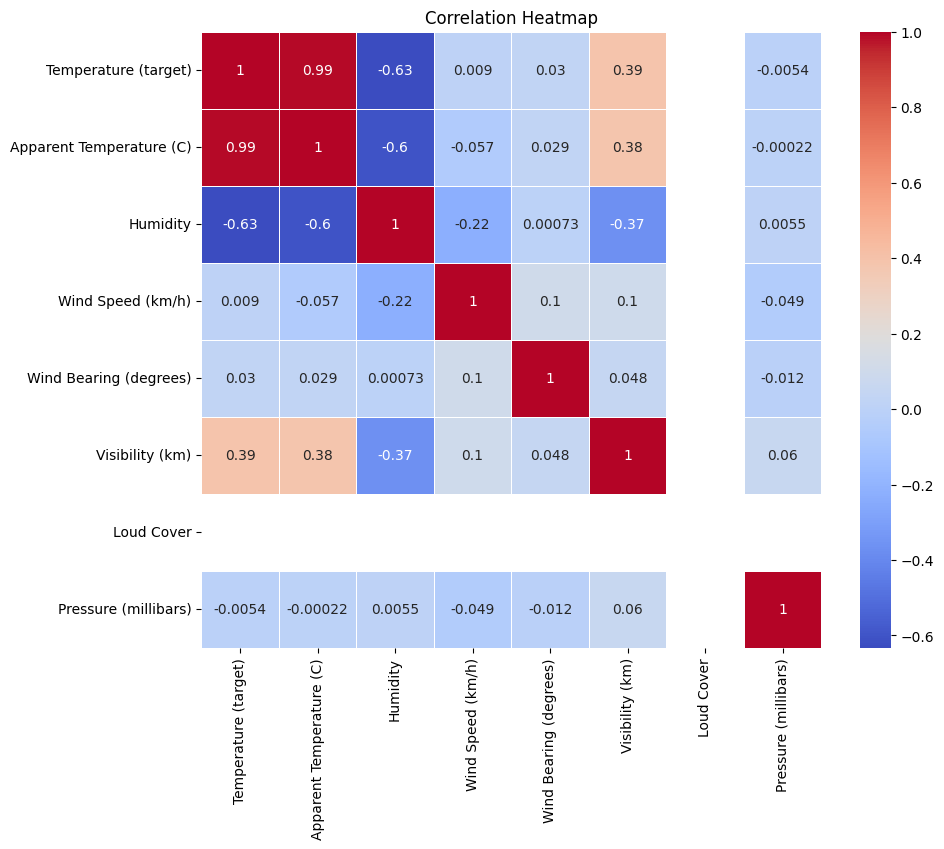

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

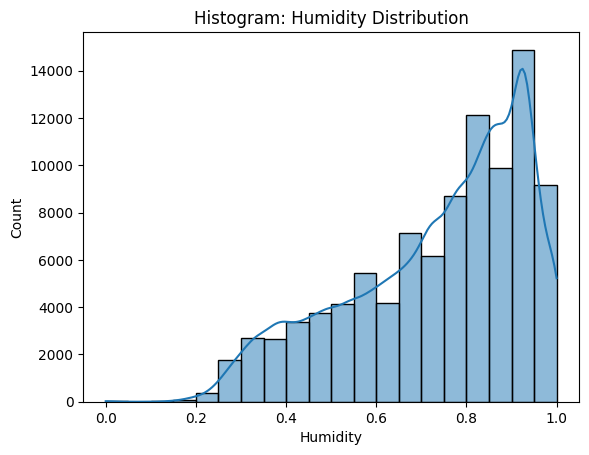

In [ ]:
sns.histplot(df['Humidity'], bins=20, kde=True)
plt.title('Histogram: Humidity Distribution')
plt.xlabel('Humidity')
plt.show()

<Axes: >

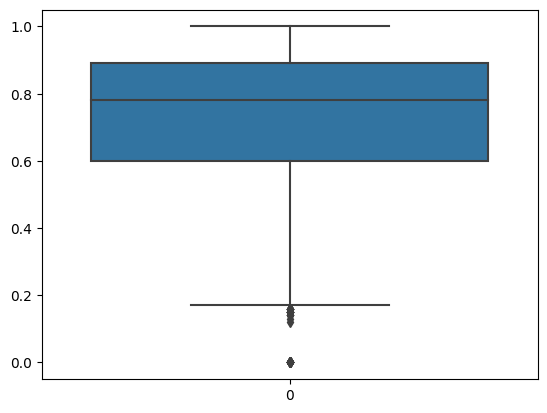

In [ ]:
sns.boxplot(df['Humidity'])

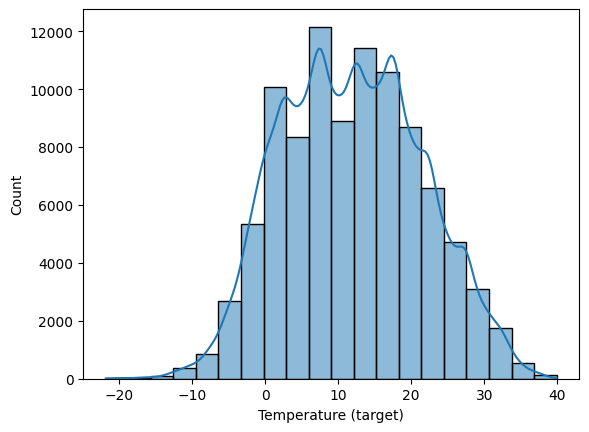

In [ ]:
sns.histplot(df['Temperature (target)'], bins=20, kde=True)
plt.show()

<Axes: >

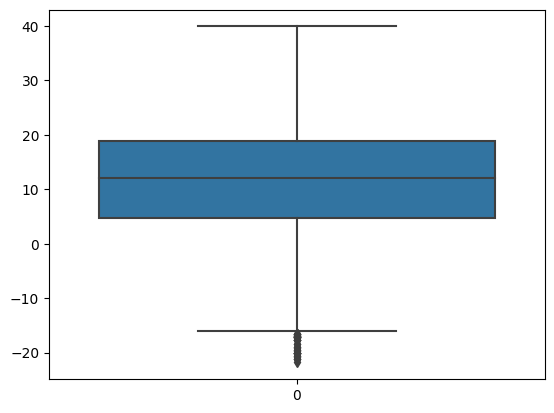

In [ ]:
sns.boxplot(df['Temperature (target)'])

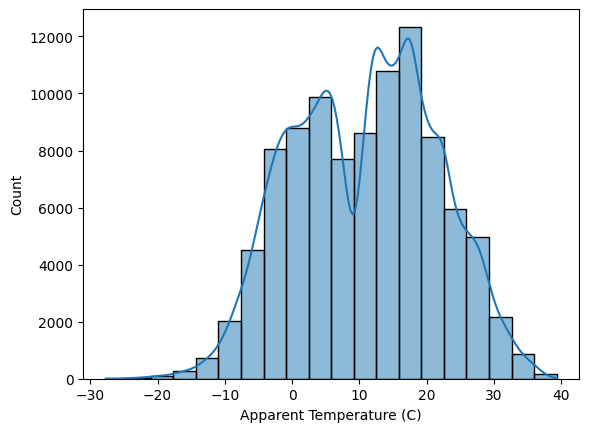

In [ ]:
sns.histplot(df['Apparent Temperature (C)'], bins=20, kde=True)
plt.show()

<Axes: >

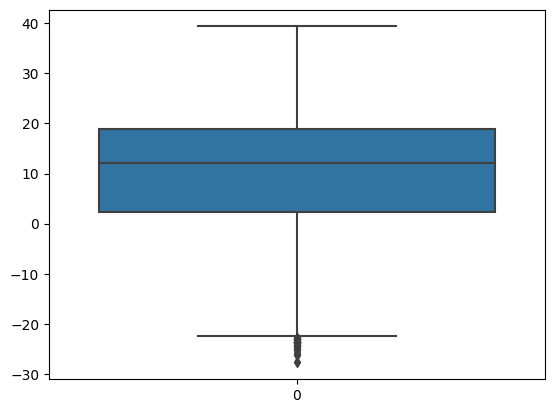

In [ ]:
sns.boxplot(df['Apparent Temperature (C)'])

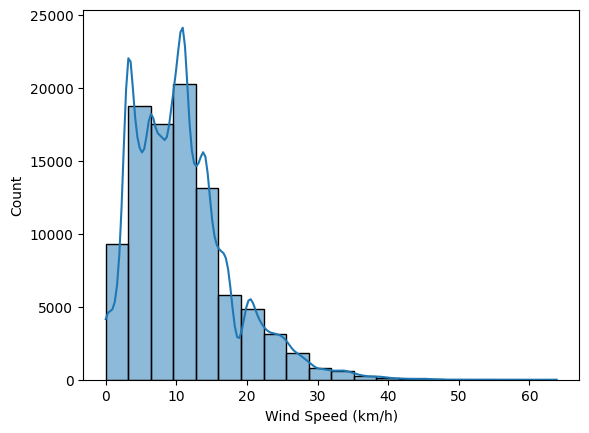

In [ ]:
sns.histplot(df['Wind Speed (km/h)'], bins=20, kde=True)
plt.show()

<Axes: >

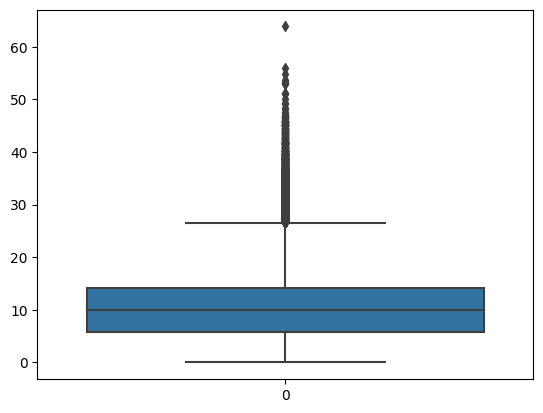

In [ ]:
sns.boxplot(df['Wind Speed (km/h)'])

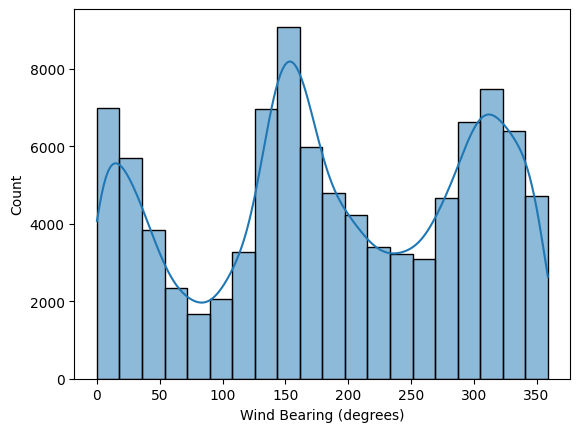

In [ ]:
sns.histplot(df['Wind Bearing (degrees)'], bins=20, kde=True)
plt.show()

<Axes: >

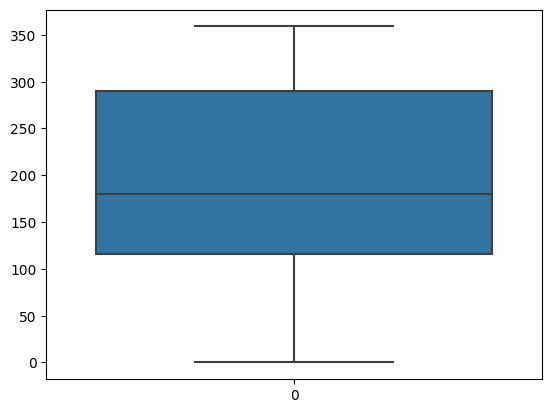

In [ ]:
sns.boxplot(df['Wind Bearing (degrees)'])

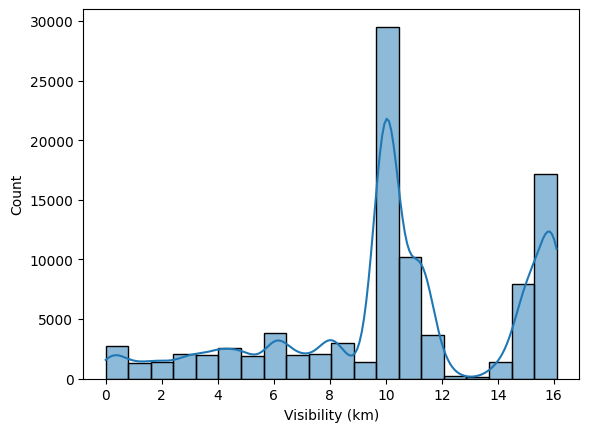

In [ ]:
sns.histplot(df['Visibility (km)'], bins=20, kde=True)
plt.show()

<Axes: >

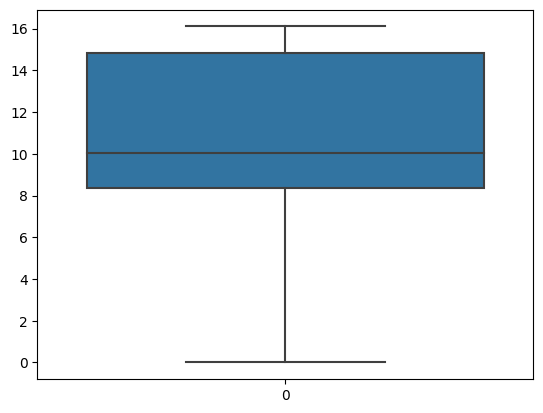

In [ ]:
sns.boxplot(df['Visibility (km)'])

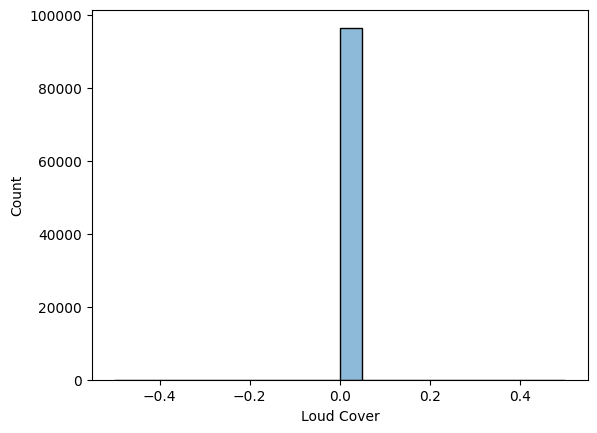

In [ ]:
sns.histplot(df['Loud Cover'], bins=20, kde=True)
plt.show()

<Axes: >

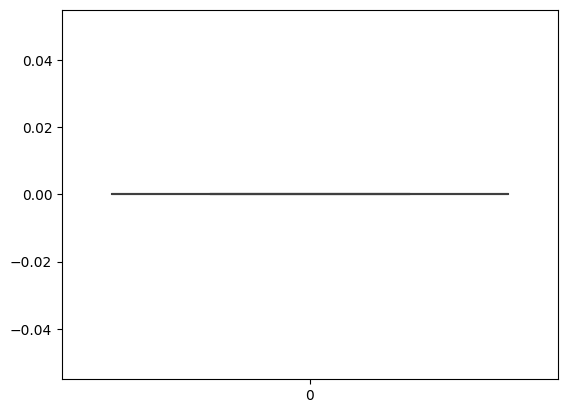

In [ ]:
sns.boxplot(df['Loud Cover'])

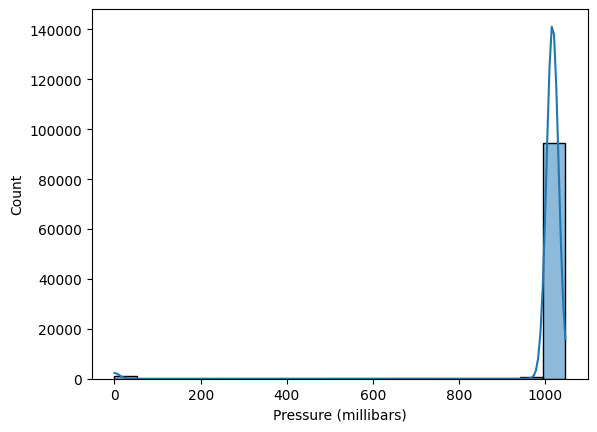

In [ ]:
sns.histplot(df['Pressure (millibars)'], bins=20, kde=True)
plt.show()

<Axes: >

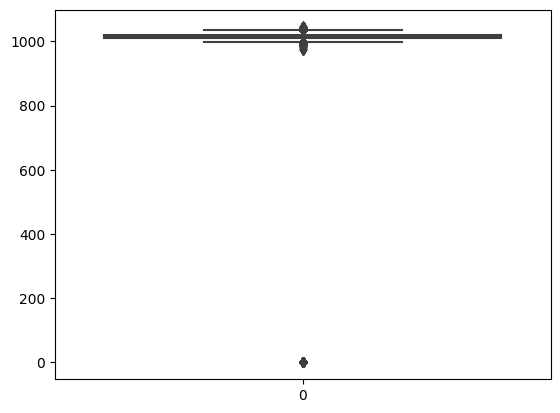

In [ ]:
sns.boxplot(df['Pressure (millibars)'])

<Axes: xlabel='Precip Type', ylabel='count'>

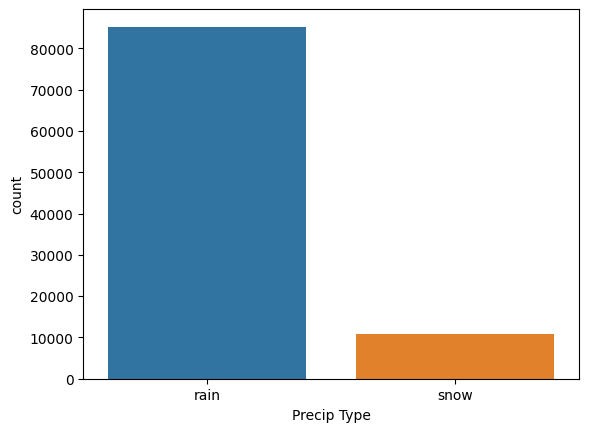

In [ ]:
sns.countplot(x='Precip Type', data=df)

##dealing with rows

###removing duplicated rows

In [ ]:
df.duplicated().value_counts()

False    96429
True        24
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.duplicated().value_counts()

False    96429
dtype: int64

###filling null values

In [ ]:
df.isnull().sum()

Formatted Date                0
Summary (target)              0
Precip Type                 517
Temperature (target)          0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df['Precip Type'].value_counts()

rain    85200
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
df['Precip Type'] = df['Precip Type'].fillna(method='pad')

In [ ]:
df.isnull().sum()

Formatted Date              0
Summary (target)            0
Precip Type                 0
Temperature (target)        0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

##dealing with columns

###removing columns that have a lot of categorical values

In [ ]:
df['Summary (target)'].value_counts()

Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
#df = df.drop(['Summary (target)'], axis=1)
#df.head(5)

In [ ]:
df['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [ ]:
df = df.drop(['Daily Summary'], axis=1)
df.head(5)

,Formatted Date,Summary (target),Precip Type,Temperature (target),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


In [ ]:
df['Formatted Date'].value_counts()

2006-04-01 00:00:00.000 +0200    1
2013-01-10 10:00:00.000 +0100    1
2013-01-10 19:00:00.000 +0100    1
2013-01-10 18:00:00.000 +0100    1
2013-01-10 17:00:00.000 +0100    1
                                ..
2009-03-09 07:00:00.000 +0100    1
2009-03-09 06:00:00.000 +0100    1
2009-03-09 05:00:00.000 +0100    1
2009-03-09 04:00:00.000 +0100    1
2016-09-09 23:00:00.000 +0200    1
Name: Formatted Date, Length: 96429, dtype: int64

In [ ]:
df = df.drop(['Formatted Date'], axis=1)
df.head(5)

,Summary (target),Precip Type,Temperature (target),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


###Encoding catigorical values

In [ ]:
# checking the values of the "Precip Type" column
df['Precip Type'].value_counts()

rain    85717
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
# will use one hot encoding because the values arent ordinal
precip_encoded = pd.get_dummies(df["Precip Type"], prefix="Precip Type")

# Concatenate the encoded columns back to the original DataFrame
df = pd.concat([df, precip_encoded], axis=1)

# Drop the original "Summary" column since it's no longer needed
df.drop("Precip Type", axis=1, inplace=True)

In [ ]:
df.head(5)

,Summary (target),Temperature (target),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow
0,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,1,0
1,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,1,0
2,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,1,0
3,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,1,0
4,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,1,0


In [ ]:
le = preprocessing.LabelEncoder()

df['Summary (target)']=le.fit_transform(df['Summary (target)'])

In [ ]:
df.head(5)

,Summary (target),Temperature (target),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow
0,19,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,1,0
1,19,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,1,0
2,17,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,1,0
3,19,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,1,0
4,17,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,1,0


###Checking the correaltion between all columns

In [ ]:
df.corr()

,Summary (target),Temperature (target),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow
Summary (target),1.000000,0.147098,0.143203,-0.112988,0.003905,0.023054,0.140262,NaN,0.143512,0.115856,-0.115856
Temperature (target),0.147098,1.000000,0.992625,-0.632331,0.009312,0.029888,0.392939,NaN,-0.005481,0.562650,-0.562650
Apparent Temperature (C),0.143203,0.992625,1.000000,-0.602641,-0.056324,0.028926,0.381804,NaN,-0.000251,0.565235,-0.565235
Humidity,-0.112988,-0.632331,-0.602641,1.000000,-0.225080,0.000689,-0.369282,NaN,0.005456,-0.232148,0.232148
Wind Speed (km/h),0.003905,0.009312,-0.056324,-0.225080,1.000000,0.103939,0.100796,NaN,-0.049243,0.068033,-0.068033
Wind Bearing (degrees),0.023054,0.029888,0.028926,0.000689,0.103939,1.000000,0.047582,NaN,-0.011665,0.041954,-0.041954
Visibility (km),0.140262,0.392939,0.381804,-0.369282,0.100796,0.047582,1.000000,NaN,0.059817,0.312879,-0.312879
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),0.143512,-0.005481,-0.000251,0.005456,-0.049243,-0.011665,0.059817,NaN,1.000000,-0.009017,0.009017
Precip Type_rain,0.115856,0.562650,0.565235,-0.232148,0.068033,0.041954,0.312879,NaN,-0.009017,1.000000,-1.000000


In [ ]:
# we can notice that the "Loud Cover" column is giving a NaN value in the correlation
# and that is because it only contain one single value as you can see
df['Loud Cover'].value_counts()

0    96429
Name: Loud Cover, dtype: int64

In [ ]:
# so we can drop it
# because a one value feature wont add any thing to the training for the model
df = df.drop(['Loud Cover'], axis=1)
df.head(5)

,Summary (target),Temperature (target),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,19,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,1,0
1,19,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,1,0
2,17,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,1,0
3,19,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,1,0
4,17,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1,0


In [ ]:
# we can also notice that there are two features that have a very strong relationship
# in this situation the best decision to take is to delete one of the features
# and keep the one that may help with visualization
# we will drop the "Apparent Temperature (C)" column because the other column is the target
df = df.drop(['Apparent Temperature (C)'], axis=1)
df.head(5)

,Summary (target),Temperature (target),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,19,9.472222,0.89,14.1197,251,15.8263,1015.13,1,0
1,19,9.355556,0.86,14.2646,259,15.8263,1015.63,1,0
2,17,9.377778,0.89,3.9284,204,14.9569,1015.94,1,0
3,19,8.288889,0.83,14.1036,269,15.8263,1016.41,1,0
4,17,8.755556,0.83,11.0446,259,15.8263,1016.51,1,0


In [ ]:
# lets check the correlation between the features again
correlation_matrix = df.corr()

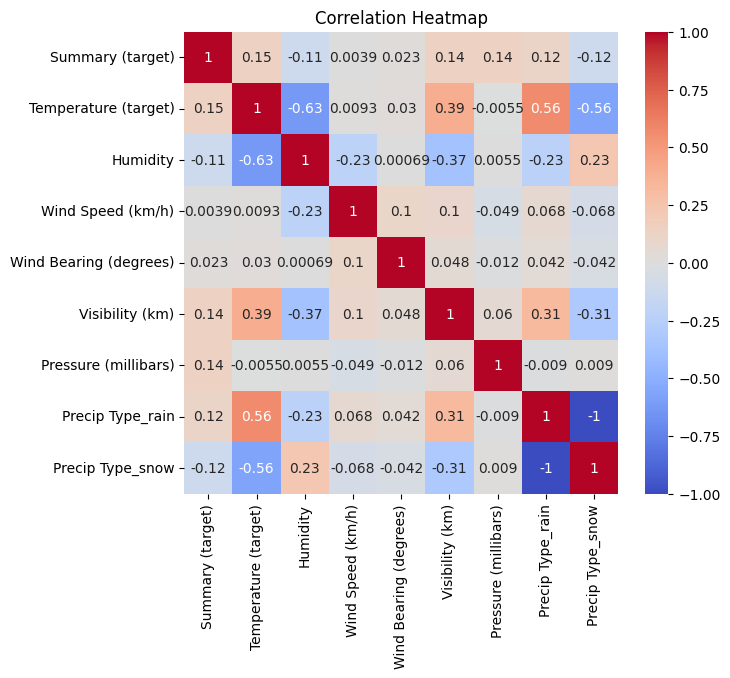

In [ ]:
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

##Normalzing the data (into three datasets)

In [ ]:
df_col = np.array(df.columns)
df_col = df_col[df_col != 'Summary (target)']
df_col

array(['Temperature (target)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Precip Type_rain', 'Precip Type_snow'],
      dtype=object)

###( FIRST DATASET )

In [ ]:
df_NoNorm = df.copy()

###( SECOND DATASET ) Min Max Scaler

In [ ]:
df_MinMax = df.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on your data and transform it
df_MinMax[df_col] = scaler.fit_transform(df_MinMax[df_col])

In [ ]:
df_MinMax.head(5)

,Summary (target),Temperature (target),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,19,0.506975,0.89,0.221130,0.699164,0.983,0.970135,1.0,0.0
1,19,0.505085,0.86,0.223399,0.721448,0.983,0.970613,1.0,0.0
2,17,0.505445,0.89,0.061523,0.568245,0.929,0.970909,1.0,0.0
3,19,0.487805,0.83,0.220877,0.749304,0.983,0.971358,1.0,0.0
4,17,0.495365,0.83,0.172970,0.721448,0.983,0.971454,1.0,0.0


###( THIRD DATASET ) Z-Score

In [ ]:
df_ZScore = df.copy()

In [ ]:
from scipy.stats import zscore

# Normalize using Z-score
df_ZScore[df_col] = df_ZScore[df_col].apply(zscore)

In [ ]:
df_ZScore.head(5)

,Summary (target),Temperature (target),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,19,-0.257315,0.793483,0.478387,0.591404,1.306867,0.101699,0.35351,-0.35351
1,19,-0.269531,0.640003,0.499347,0.665908,1.306867,0.105973,0.35351,-0.35351
2,17,-0.267204,0.793483,-0.995769,0.153689,1.099498,0.108623,0.35351,-0.35351
3,19,-0.381218,0.486522,0.476059,0.759039,1.306867,0.112640,0.35351,-0.35351
4,17,-0.332355,0.486522,0.033579,0.665908,1.306867,0.113495,0.35351,-0.35351


##Training and Testing the model

###( FIRST MODEL )

In [ ]:
X = df_NoNorm.drop(['Summary (target)'], axis=1).values
y = df_NoNorm['Summary (target)'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.998, random_state=0)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import mode
k=3
euclidean_distances = lambda p1, p2:np.sqrt(np.sum((p1-p2)**2))
y_pred =[]

for item in X_test:
  point_dist = []
  for j in range(len(X_train)):
    euclideandDist = euclidean_distances(np.array(X_train[j,:]), item)
    point_dist.append(euclideandDist)
  point_dist = np.array(point_dist)
  dist = np.argsort(point_dist)[:k]
  labels = y_train[dist]
  moj = mode(labels)
  moj = moj.mode[0]
  y_pred.append(moj)

<ipython-input-197-2312355f1d4b>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moj = mode(labels)


#### Calcluate the Preformance Measure

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test , y_pred , average = 'macro')
pre_1 = precision_score(y_test , y_pred , average = 'macro')
rec_1 = recall_score(y_test , y_pred , average = 'macro')

print("Accuracy: ",acc_1)
print('precision is: ' , pre_1)
print('recall is: ', rec_1)
print('f1 score is: ' , f1_1)

Accuracy:  0.29921963485977326
precision is:  0.06603697792157003
recall is:  0.0702810617195399
f1 score is:  0.061830389869614866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
No_Norm_prof = pd.DataFrame({'real': y_test, 'predicted': y_pred})
No_Norm_prof.head(10)

,real,predicted
0,17,6
1,19,19
2,12,17
3,6,6
4,17,6
5,19,6
6,19,6
7,17,17
8,17,6
9,17,17


###( SECOND MODEL )

In [ ]:
X = df_MinMax.drop(['Summary (target)'], axis=1).values
y = df_MinMax['Summary (target)'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.998, random_state=0)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import mode
k=3
euclidean_distances = lambda p1, p2:np.sqrt(np.sum((p1-p2)**2))
y_pred =[]

for item in X_test:
  point_dist = []
  for j in range(len(X_train)):
    euclideandDist = euclidean_distances(np.array(X_train[j,:]), item)
    point_dist.append(euclideandDist)
  point_dist = np.array(point_dist)
  dist = np.argsort(point_dist)[:k]
  labels = y_train[dist]
  moj = mode(labels)
  moj = moj.mode[0]
  y_pred.append(moj)

<ipython-input-202-2312355f1d4b>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moj = mode(labels)


#### Calcluate the Preformance Measure

In [ ]:
acc_2 = accuracy_score(y_test, y_pred)
f1_2 = f1_score(y_test , y_pred , average = 'macro')
pre_2 = precision_score(y_test , y_pred , average = 'macro')
rec_2 = recall_score(y_test , y_pred , average = 'macro')

print("Accuracy: ",acc_2)
print('precision is: ' , pre_2)
print('recall is: ', rec_2)
print('f1 score is: ' , f1_2)

Accuracy:  0.3737232041730312
precision is:  0.08623587735937273
recall is:  0.09089407385036037
f1 score is:  0.08233928751217355


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
MinMax_prof = pd.DataFrame({'real': y_test, 'predicted': y_pred})
MinMax_prof.head(10)

,real,predicted
0,17,17
1,19,19
2,12,12
3,6,17
4,17,17
5,19,6
6,19,17
7,17,17
8,17,6
9,17,17


###( THIRD MODEL ) with different K value

####K=3

In [ ]:
X = df_ZScore.drop(['Summary (target)'], axis=1).values
y = df_ZScore['Summary (target)'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.998, random_state=0)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import mode
k=3
euclidean_distances = lambda p1, p2:np.sqrt(np.sum((p1-p2)**2))
y_pred =[]

for item in X_test:
  point_dist = []
  for j in range(len(X_train)):
    euclideandDist = euclidean_distances(np.array(X_train[j,:]), item)
    point_dist.append(euclideandDist)
  point_dist = np.array(point_dist)
  dist = np.argsort(point_dist)[:k]
  labels = y_train[dist]
  moj = mode(labels)
  moj = moj.mode[0]
  y_pred.append(moj)

<ipython-input-207-2312355f1d4b>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moj = mode(labels)


##### Calcluate the Preformance Measure

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_3_3 = accuracy_score(y_test, y_pred)
f1_3_3 = f1_score(y_test , y_pred , average = 'macro')
pre_3_3 = precision_score(y_test , y_pred , average = 'macro')
rec_3_3 = recall_score(y_test , y_pred , average = 'macro')

print("Accuracy: ",acc_3_3)
print('precision is: ' , pre_3_3)
print('recall is: ', rec_3_3)
print('f1 score is: ' , f1_3_3)

Accuracy:  0.3779523468104783
precision is:  0.09274030550209274
recall is:  0.10598670309026129
f1 score is:  0.08916569867004628


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Z_score_3_prof = pd.DataFrame({'real': y_test, 'predicted': y_pred})
Z_score_3_prof.head(10)

,real,predicted
0,17,17
1,19,19
2,12,12
3,6,17
4,17,17
5,19,6
6,19,17
7,17,17
8,17,6
9,17,17


####K=5

In [ ]:
X = df_ZScore.drop(['Summary (target)'], axis=1).values
y = df_ZScore['Summary (target)'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.998, random_state=0)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import mode
k=5
euclidean_distances = lambda p1, p2:np.sqrt(np.sum((p1-p2)**2))
y_pred =[]

for item in X_test:
  point_dist = []
  for j in range(len(X_train)):
    euclideandDist = euclidean_distances(np.array(X_train[j,:]), item)
    point_dist.append(euclideandDist)
  point_dist = np.array(point_dist)
  dist = np.argsort(point_dist)[:k]
  labels = y_train[dist]
  moj = mode(labels)
  moj = moj.mode[0]
  y_pred.append(moj)

<ipython-input-231-f221d26f2823>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moj = mode(labels)


##### Calcluate the Preformance Measure

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_3_5 = accuracy_score(y_test, y_pred)
f1_3_5 = f1_score(y_test , y_pred , average = 'macro')
pre_3_5 = precision_score(y_test , y_pred , average = 'macro')
rec_3_5 = recall_score(y_test , y_pred , average = 'macro')

print("Accuracy: ",acc_3_5)
print('precision is: ' , pre_3_5)
print('recall is: ', rec_3_5)
print('f1 score is: ' , f1_3_5)

Accuracy:  0.39736276068456
precision is:  0.08931676242086904
recall is:  0.10283080437844459
f1 score is:  0.08536918366227636


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Z_score_5_prof = pd.DataFrame({'real': y_test, 'predicted': y_pred})
Z_score_5_prof.head(10)

,real,predicted
0,17,17
1,19,19
2,12,12
3,6,17
4,17,17
5,19,19
6,19,17
7,17,17
8,17,19
9,17,17


####K=1

In [ ]:
X = df_ZScore.drop(['Summary (target)'], axis=1).values
y = df_ZScore['Summary (target)'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.998, random_state=0)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import mode
k=1
euclidean_distances = lambda p1, p2:np.sqrt(np.sum((p1-p2)**2))
y_pred =[]

for item in X_test:
  point_dist = []
  for j in range(len(X_train)):
    euclideandDist = euclidean_distances(np.array(X_train[j,:]), item)
    point_dist.append(euclideandDist)
  point_dist = np.array(point_dist)
  dist = np.argsort(point_dist)[:k]
  labels = y_train[dist]
  moj = mode(labels)
  moj = moj.mode[0]
  y_pred.append(moj)

##### Calcluate the Preformance Measure

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_3_1 = accuracy_score(y_test, y_pred)
f1_3_1 = f1_score(y_test , y_pred , average = 'macro')
pre_3_1 = precision_score(y_test , y_pred , average = 'macro')
rec_3_1 = recall_score(y_test , y_pred , average = 'macro')

print("Accuracy: ",acc_3_1)
print('precision is: ' , pre_3_1)
print('recall is: ', rec_3_1)
print('f1 score is: ' , f1_3_1)

Accuracy:  0.38034227999625925
precision is:  0.09146055614939406
recall is:  0.09800152582758506
f1 score is:  0.08834858589768278


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#lol = pd.DataFrame([y_test, y_pred])
Z_score_1_prof = pd.DataFrame({'real': y_test, 'predicted': y_pred})
Z_score_1_prof.head(10)

,real,predicted
0,17,19
1,19,19
2,12,12
3,6,17
4,17,17
5,19,6
6,19,18
7,17,19
8,17,18
9,17,17


##Visualizing the Measures

###Preparing and visulazing the ( normalized_models_measures ) Data Frame

In [ ]:
normalized_models_measures = pd.DataFrame({'methods': ['No Norm', 'MinMax Scaler', 'Z-score Scaler', 'No Norm', 'MinMax Scaler', 'Z-score Scaler','No Norm', 'MinMax Scaler', 'Z-score Scaler','No Norm', 'MinMax Scaler', 'Z-score Scaler'],
                    'Measurements': [acc_1, acc_2, acc_3_3,  pre_1, pre_2, pre_3_3, rec_1, rec_2, rec_3_3, f1_1, f1_2, f1_3_3],
                    'Measurements Name': ['accuracy', 'accuracy', 'accuracy', 'Precision', 'Precision', 'Precision', 'recall', 'recall', 'recall', 'f1 score', 'f1 score', 'f1 score']})

normalized_models_measures

,methods,Measurements,Measurements Name
0,No Norm,0.299220,accuracy
1,MinMax Scaler,0.373723,accuracy
2,Z-score Scaler,0.377952,accuracy
3,No Norm,0.066037,Precision
4,MinMax Scaler,0.086236,Precision
5,Z-score Scaler,0.092740,Precision
6,No Norm,0.070281,recall
7,MinMax Scaler,0.090894,recall
8,Z-score Scaler,0.105987,recall
9,No Norm,0.061830,f1 score


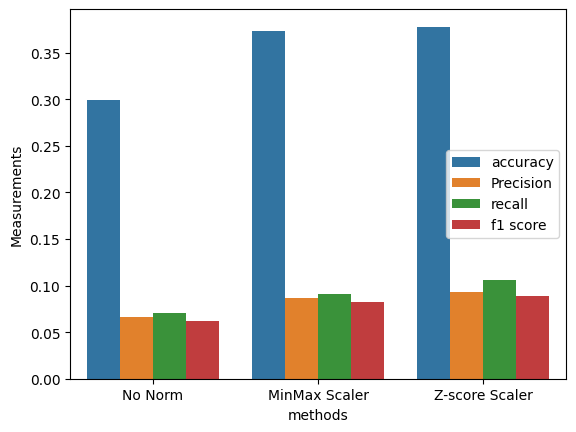

In [ ]:
sns.barplot(x='methods', y='Measurements', hue='Measurements Name', data=normalized_models_measures)
plt.legend(loc='center right')

###Preparing and visulazing the ( Zscore_K_values_measures ) Data Frame

In [ ]:
Zscore_K_values_measures = pd.DataFrame({'K Value': ['K=1', 'K=3', 'K=5', 'K=1', 'K=3', 'K=5','K=1', 'K=3', 'K=5','K=1', 'K=3', 'K=5'],
                    'Measurements': [acc_3_1, acc_3_3, acc_3_5,  pre_3_1, pre_3_3, pre_3_5, rec_3_1, rec_3_3, rec_3_5, f1_3_1, f1_3_3, f1_3_5],
                    'Measurements Name': ['accuracy', 'accuracy', 'accuracy', 'Precision', 'Precision', 'Precision', 'recall', 'recall', 'recall', 'f1 score', 'f1 score', 'f1 score']})
Zscore_K_values_measures

,K Value,Measurements,Measurements Name
0,K=1,0.380342,accuracy
1,K=3,0.377952,accuracy
2,K=5,0.397363,accuracy
3,K=1,0.091461,Precision
4,K=3,0.092740,Precision
5,K=5,0.089317,Precision
6,K=1,0.098002,recall
7,K=3,0.105987,recall
8,K=5,0.102831,recall
9,K=1,0.088349,f1 score


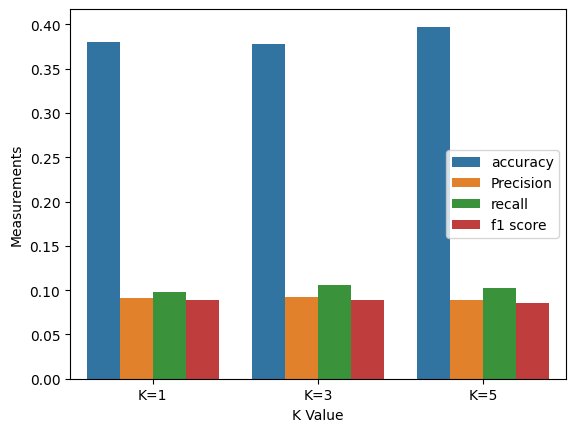

In [ ]:
sns.barplot(x='K Value', y='Measurements', hue='Measurements Name', data=Zscore_K_values_measures)
plt.legend(loc='center right')